Importing libraries

In [89]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Data cleaning and importing



In [90]:
df =pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [91]:



df['Text'].replace('', np.nan, inplace=True)


df.dropna(subset=['Text'], inplace=True)

C:\Users\Jainil\AppData\Local\Temp\ipykernel_2756\1224229111.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Text'].replace('', np.nan, inplace=True)


In [92]:
df = df[['Score','Text']]

In [93]:
df.isna().sum()

Score    0
Text     0
dtype: int64

Changing score in 0 or 1 
for score greater than 3 its 1 and less than three its 0

In [94]:
df['Sentiment'] = df['Score'].apply(lambda score: 1 if score > 3 else 0)

Dividing data set into training set and test set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    df['Text'].values,
    df['Sentiment'].values,
    test_size=0.2,
    random_state=42/
)

In [96]:
df=df.sample(n=100000,random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 165256 to 174904
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Score      100000 non-null  int64 
 1   Text       100000 non-null  object
 2   Sentiment  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


Using text vectorization we are dividing reviews into array of words

In [97]:
vectorize_layer=TextVectorization(
    max_tokens=10000,
    output_sequence_length=200
)
text = df['Text']
vectorize_layer.adapt(text)


using Lstm model to predict the the score 

In [98]:
model =keras.Sequential()
model.add(vectorize_layer)
model.add(keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(keras.layers.LSTM(units=128,dropout=0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [99]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
X=df['Text'].values
y=df['Sentiment'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 697s 278ms/step - accuracy: 0.7840 - loss: 0.5225 - val_accuracy: 0.7778 - val_loss: 0.5297
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 738s 295ms/step - accuracy: 0.8490 - loss: 0.3539 - val_accuracy: 0.8977 - val_loss: 0.2545
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1228s 491ms/step - accuracy: 0.9157 - loss: 0.2122 - val_accuracy: 0.9076 - val_loss: 0.2295
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 530s 212ms/step - accuracy: 0.9397 - loss: 0.1592 - val_accuracy: 0.9071 - val_loss: 0.2539
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 322s 129ms/step - accuracy: 0.9561 - loss: 0.1210 - val_accuracy: 0.9073 - val_loss: 0.2615
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 339s 136ms/step - accuracy: 0.9689 - loss: 0.0897 - val_accuracy: 0.9053 - val_loss: 0.3043
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 364s 146ms/step - accuracy: 0.9781 - loss: 0.0675 - val_accuracy: 0.9071 - val_loss: 0.3147
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 341s 129ms/step - a

evaluation of loss and test accuracy

In [102]:

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

  5/625 ━━━━━━━━━━━━━━━━━━━━ 1:19 129ms/step - accuracy: 0.9056 - loss: 0.2757

625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9054 - loss: 0.4214
Test Loss: 0.4214
Test Accuracy: 90.54%


testing the model for new data

In [103]:

new_reviews = [
    "This was the best purchase I have ever made, absolutely fantastic!",
    "A complete waste of money. I would not recommend this product at all.",
    "The movie was just okay, not great but not terrible either."
]


reviews_dataset = tf.data.Dataset.from_tensor_slices(new_reviews)

reviews_dataset = reviews_dataset.batch(1)


predictions = model.predict(reviews_dataset)


for i, pred in enumerate(predictions):
    print(f"Review: {new_reviews[i]}")
    print(f"Prediction Score: {pred[0]:.4f}")
    if pred[0] > 0.5:
        print("Sentiment: Positive\n")
    else:
        print("Sentiment: Negative\n")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Review: This was the best purchase I have ever made, absolutely fantastic!
Prediction Score: 0.9993
Sentiment: Positive

Review: A complete waste of money. I would not recommend this product at all.
Prediction Score: 0.0008
Sentiment: Negative

Review: The movie was just okay, not great but not terrible either.
Prediction Score: 0.0440
Sentiment: Negative



ploting the graph between accuaracy vs epochs and loss vs epochs

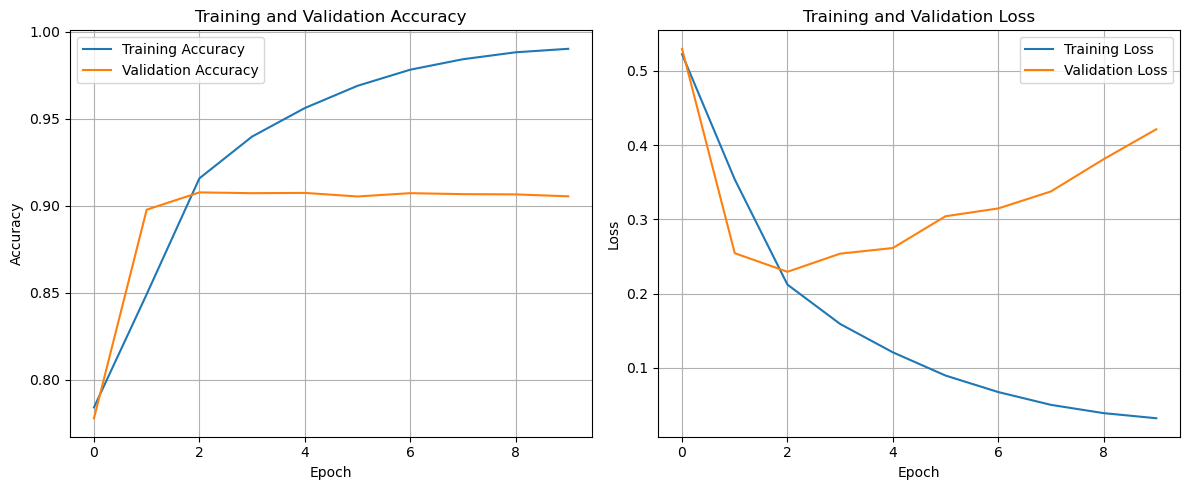

In [ ]:





plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plotting confusion matrix

625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step


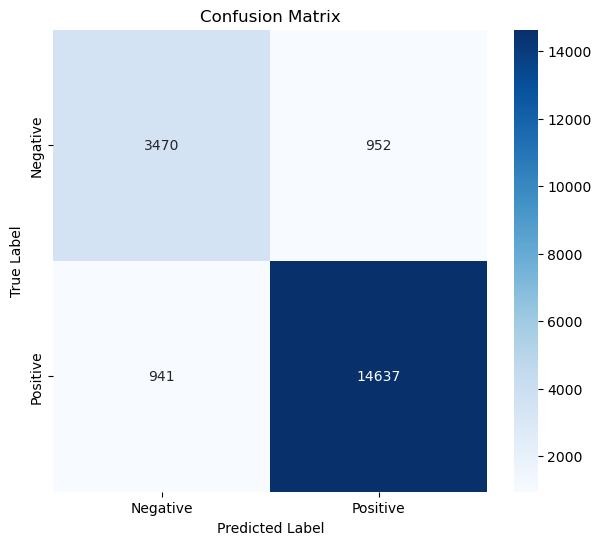

In [105]:




predictions_prob = model.predict(X_test)

predictions = (predictions_prob > 0.5).astype(int)


cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()